# Logistic Regression

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
# Data Loading
# Check the current working directory
print("Current working directory:", os.getcwd())

# Define the path to your CSV file
file_path = '/Users/minarandolf/Capstone/Capstone-Project/datasets/contracts_clean_final.csv'

# Load the CSV file into a DataFrame
try:
    contracts = pd.read_csv(file_path)
    print(f"Number of observations: {len(contracts)}")
    print("Column names:")
    print(contracts.columns)
    print("Column types:")
    print(contracts.dtypes)
    print(contracts.head())
except FileNotFoundError:
    print(f"The file {file_path} does not exist in the current working directory.")

Current working directory: /Users/minarandolf/Capstone/Capstone-Project/models_scripts


/var/folders/72/ct286z0d1tz0s971c6b7qshh0000gn/T/ipykernel_34322/1251393299.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  contracts = pd.read_csv(file_path)


Number of observations: 10353244
Column names:
Index(['Unnamed: 0', 'ANO_SID', 'CORPORATE_DEVISION', 'Bundesland', 'Kreis',
       'Typ', 'ORTPLZ', 'ORTS-NAME', 'STRASSE', 'SUM_INSURED',
       'CONSTRACTION_DESIGN', 'CONSTRUCTION_YEAR', 'WFL', 'ZONE', 'SF-SYSTEM',
       'TYPE_OF_DEDUCTIBLE', 'DRAIN_PIPE_INSURED', 'PRODUCTLINE',
       'PRIOR_DAMAGES', 'UVV-KZ', 'UNDERWRITER', 'PARTY-ID', 'contract_year',
       'PIPE_PREMIUM_AMOUNT', 'YEAR', 'DAMAGE_FLOOD_ZONE',
       'DAMAGE_HEAVY_RAIN_ZONE', 'LONGITUDE', 'LATITUDE', 'DAMAGE'],
      dtype='object')
Column types:
Unnamed: 0                  int64
ANO_SID                   float64
CORPORATE_DEVISION         object
Bundesland                 object
Kreis                      object
Typ                        object
ORTPLZ                      int64
ORTS-NAME                  object
STRASSE                    object
SUM_INSURED               float64
CONSTRACTION_DESIGN        object
CONSTRUCTION_YEAR         float64
WFL               

## Preprocess the data

In [3]:
# Drop columns that are not needed for the model (or would be too hard to encode), except for 'ANO_SID'
contracts = contracts.drop(['Unnamed: 0', 'SF-SYSTEM', 'ORTS-NAME', 'STRASSE', 'PARTY-ID', 'contract_year',
                            'Kreis', 'DAMAGE_FLOOD_ZONE', 'SUM_INSURED', 'PIPE_PREMIUM_AMOUNT'], axis=1)
contracts = contracts.dropna()

In [4]:
# Convert all zone values to string (to reduce amount of unique values)
print('Original unique values:', contracts['ZONE'].nunique())
contracts['ZONE'] = contracts['ZONE'].astype('str')
print('New unique values:', contracts['ZONE'].nunique())

Original unique values: 27
New unique values: 18


In [5]:
# Prepare binary variables
columns_to_encode = contracts.select_dtypes(include=['object']).columns
df_binary = pd.get_dummies(contracts, columns=columns_to_encode, drop_first=True)
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7163047 entries, 0 to 10353243
Data columns (total 62 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   ANO_SID                                        float64
 1   ORTPLZ                                         int64  
 2   CONSTRUCTION_YEAR                              float64
 3   WFL                                            float64
 4   TYPE_OF_DEDUCTIBLE                             int64  
 5   DRAIN_PIPE_INSURED                             int64  
 6   PRIOR_DAMAGES                                  int64  
 7   UVV-KZ                                         int64  
 8   YEAR                                           int64  
 9   DAMAGE_HEAVY_RAIN_ZONE                         float64
 10  LONGITUDE                                      float64
 11  LATITUDE                                       float64
 12  DAMAGE                                        

In [6]:
# Print the number of observations after preprocessing
print(f"Number of observations after preprocessing: {len(df_binary)}")

Number of observations after preprocessing: 7163047


## Data Analysis

In [7]:
# Data Analysis
# Count the occurrences of each class in the target variable 'DAMAGE'
damage_counts = contracts['DAMAGE'].value_counts()

# Print the results
print("Number of observations for each class in 'DAMAGE':")
print(damage_counts)

# Display the percentage distribution
damage_percentage = contracts['DAMAGE'].value_counts(normalize=True) * 100
print("\nPercentage distribution of each class in 'DAMAGE':")
print(damage_percentage)

Number of observations for each class in 'DAMAGE':
DAMAGE
0    7075917
1      87130
Name: count, dtype: int64

Percentage distribution of each class in 'DAMAGE':
DAMAGE
0    98.783618
1     1.216382
Name: proportion, dtype: float64


## Rolling Window Estimation and Logistic Regression

  0%|                                                                                                 | 0/10 [00:00<?, ?it/s]

Processing train year: 2014, test year: 2015
Classification report for year 2015:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    640012
           1       0.04      0.70      0.07      6430

    accuracy                           0.82    646442
   macro avg       0.52      0.76      0.49    646442
weighted avg       0.99      0.82      0.89    646442

Confusion matrix for year 2015:
[[526820 113192]
 [  1912   4518]]


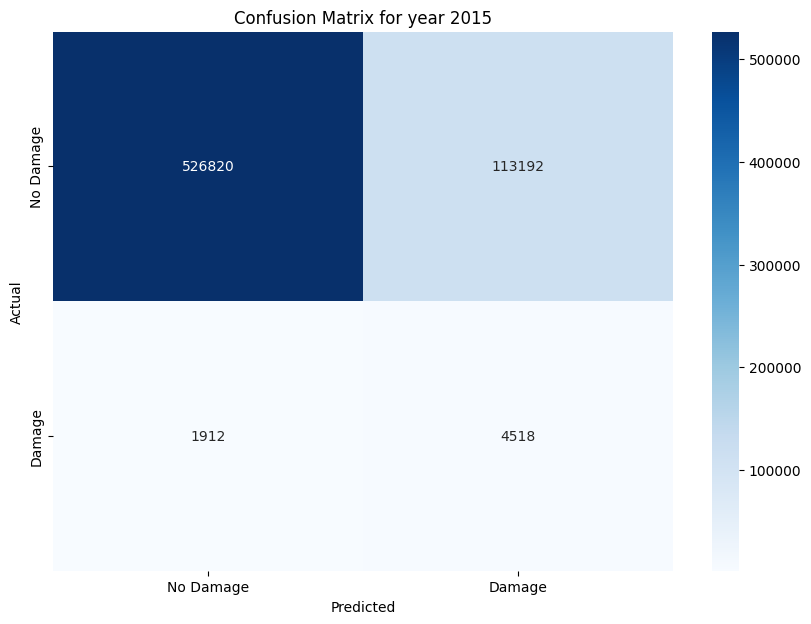

 10%|████████▉                                                                                | 1/10 [00:04<00:40,  4.47s/it]

Year: 2015
No Damage: 528732 (81.79%)
Damage: 117710 (18.21%)
Processing train year: 2015, test year: 2016
Classification report for year 2016:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    664131
           1       0.04      0.73      0.07      7250

    accuracy                           0.79    671381
   macro avg       0.52      0.76      0.48    671381
weighted avg       0.99      0.79      0.87    671381

Confusion matrix for year 2016:
[[525024 139107]
 [  1937   5313]]


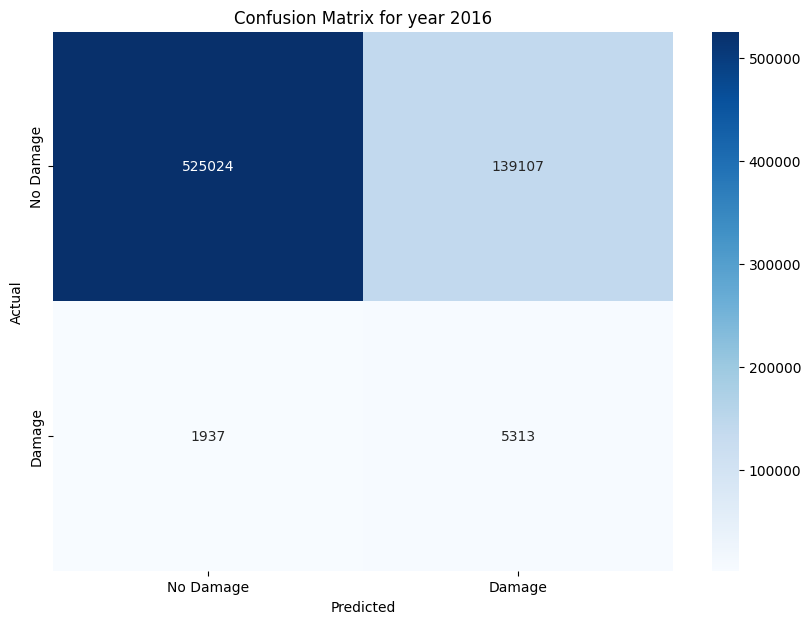

 20%|█████████████████▊                                                                       | 2/10 [00:08<00:35,  4.48s/it]

Year: 2016
No Damage: 526961 (78.49%)
Damage: 144420 (21.51%)
Processing train year: 2016, test year: 2017
Classification report for year 2017:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    628238
           1       0.04      0.73      0.07      7064

    accuracy                           0.78    635302
   macro avg       0.52      0.75      0.47    635302
weighted avg       0.99      0.78      0.87    635302

Confusion matrix for year 2017:
[[491184 137054]
 [  1930   5134]]


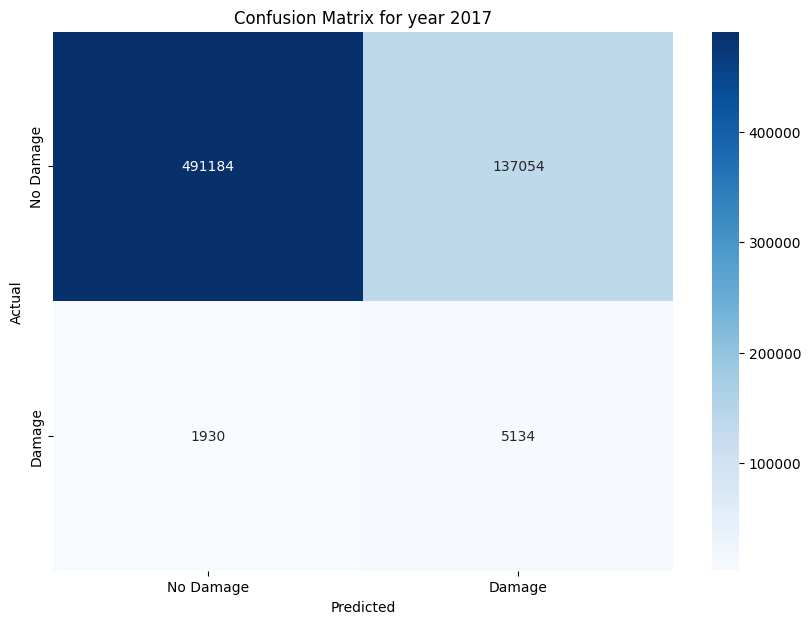

 30%|██████████████████████████▋                                                              | 3/10 [00:13<00:30,  4.31s/it]

Year: 2017
No Damage: 493114 (77.62%)
Damage: 142188 (22.38%)
Processing train year: 2017, test year: 2018
Classification report for year 2018:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    628920
           1       0.04      0.74      0.08      8348

    accuracy                           0.77    637268
   macro avg       0.52      0.76      0.47    637268
weighted avg       0.98      0.77      0.86    637268

Confusion matrix for year 2018:
[[485708 143212]
 [  2187   6161]]


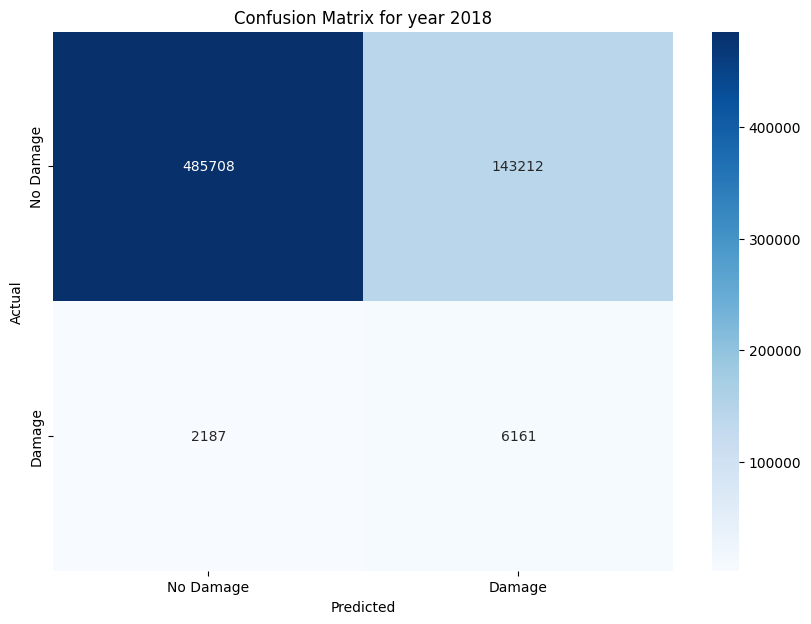

 40%|███████████████████████████████████▌                                                     | 4/10 [00:17<00:25,  4.29s/it]

Year: 2018
No Damage: 487895 (76.56%)
Damage: 149373 (23.44%)
Processing train year: 2018, test year: 2019
Classification report for year 2019:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    633549
           1       0.04      0.75      0.08      8983

    accuracy                           0.76    642532
   macro avg       0.52      0.76      0.47    642532
weighted avg       0.98      0.76      0.85    642532

Confusion matrix for year 2019:
[[483122 150427]
 [  2212   6771]]


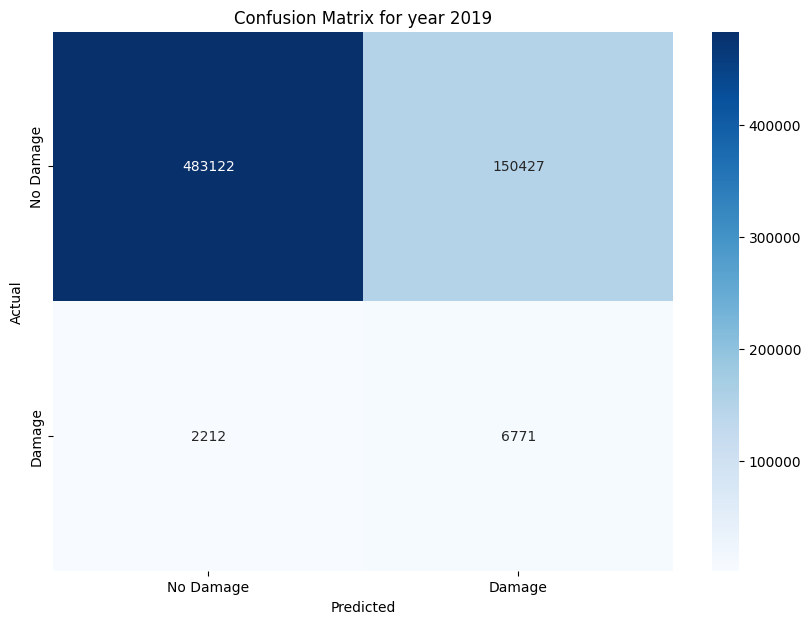

 50%|████████████████████████████████████████████▌                                            | 5/10 [00:20<00:20,  4.01s/it]

Year: 2019
No Damage: 485334 (75.53%)
Damage: 157198 (24.47%)
Processing train year: 2019, test year: 2020
Classification report for year 2020:
              precision    recall  f1-score   support

           0       0.99      0.75      0.86    641745
           1       0.05      0.77      0.09     10508

    accuracy                           0.75    652253
   macro avg       0.52      0.76      0.47    652253
weighted avg       0.98      0.75      0.84    652253

Confusion matrix for year 2020:
[[481838 159907]
 [  2434   8074]]


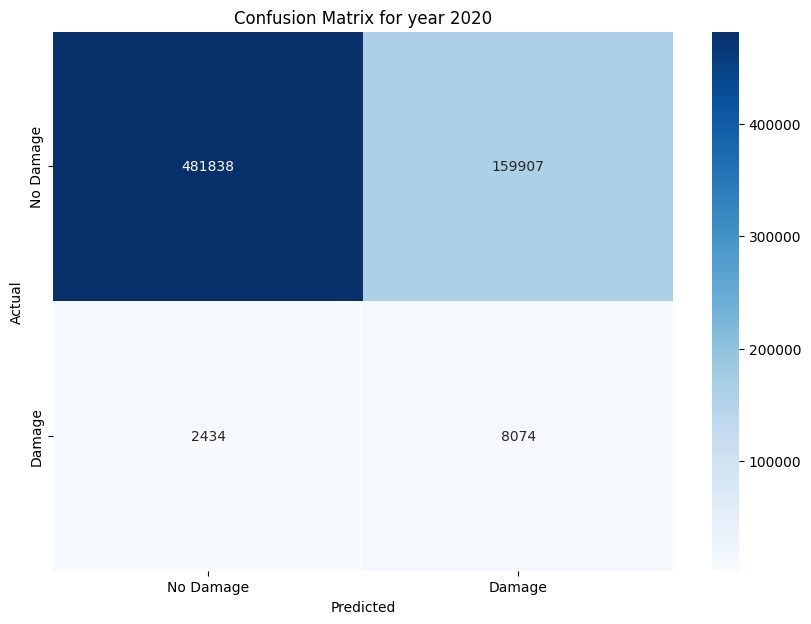

 60%|█████████████████████████████████████████████████████▍                                   | 6/10 [00:24<00:16,  4.00s/it]

Year: 2020
No Damage: 484272 (74.25%)
Damage: 167981 (25.75%)
Processing train year: 2020, test year: 2021
Classification report for year 2021:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    646956
           1       0.05      0.79      0.09     11532

    accuracy                           0.73    658488
   macro avg       0.52      0.76      0.47    658488
weighted avg       0.98      0.73      0.83    658488

Confusion matrix for year 2021:
[[473884 173072]
 [  2433   9099]]


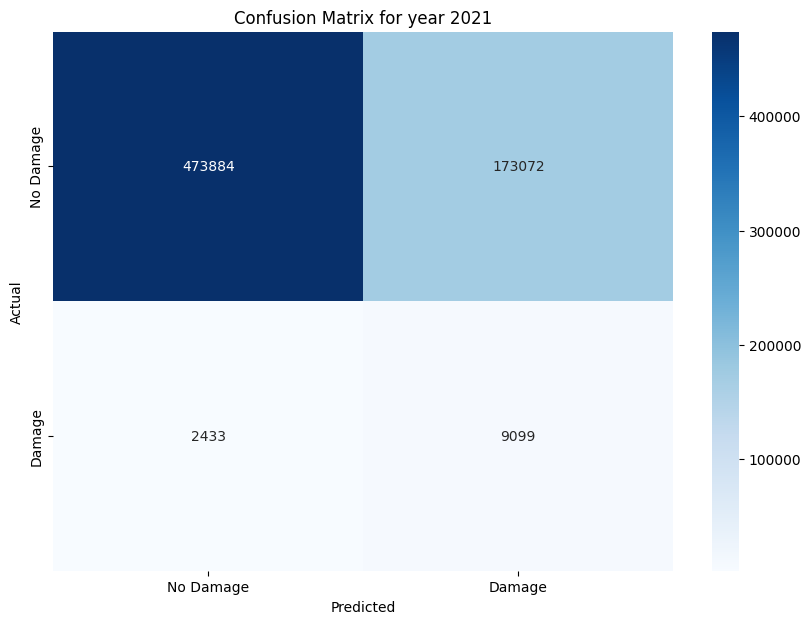

 70%|██████████████████████████████████████████████████████████████▎                          | 7/10 [00:29<00:12,  4.18s/it]

Year: 2021
No Damage: 476317 (72.33%)
Damage: 182171 (27.67%)
Processing train year: 2021, test year: 2022
Classification report for year 2022:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    655980
           1       0.04      0.82      0.08     10026

    accuracy                           0.71    666006
   macro avg       0.52      0.77      0.45    666006
weighted avg       0.98      0.71      0.82    666006

Confusion matrix for year 2022:
[[466255 189725]
 [  1795   8231]]


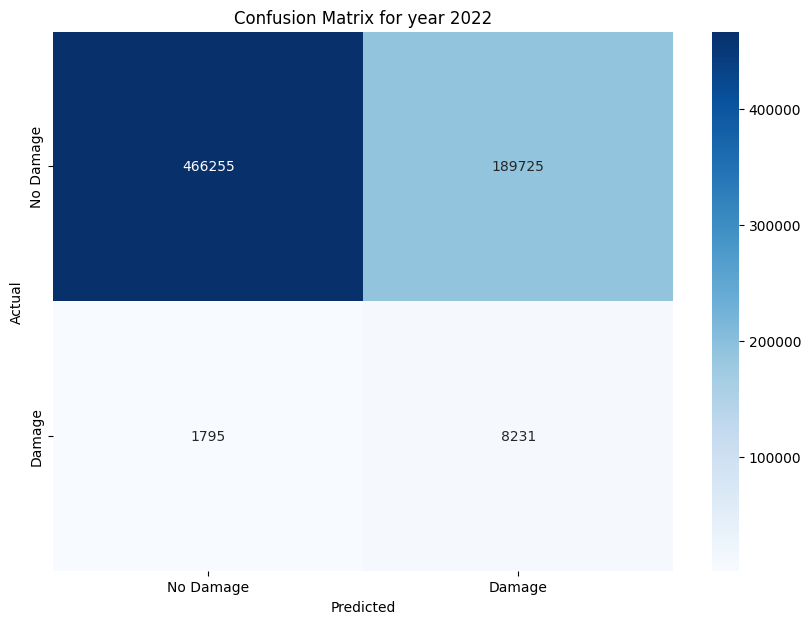

 80%|███████████████████████████████████████████████████████████████████████▏                 | 8/10 [00:33<00:08,  4.25s/it]

Year: 2022
No Damage: 468050 (70.28%)
Damage: 197956 (29.72%)
Processing train year: 2022, test year: 2023
Classification report for year 2023:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82    658797
           1       0.03      0.83      0.07      8601

    accuracy                           0.70    667398
   macro avg       0.52      0.76      0.44    667398
weighted avg       0.98      0.70      0.81    667398

Confusion matrix for year 2023:
[[456755 202042]
 [  1473   7128]]


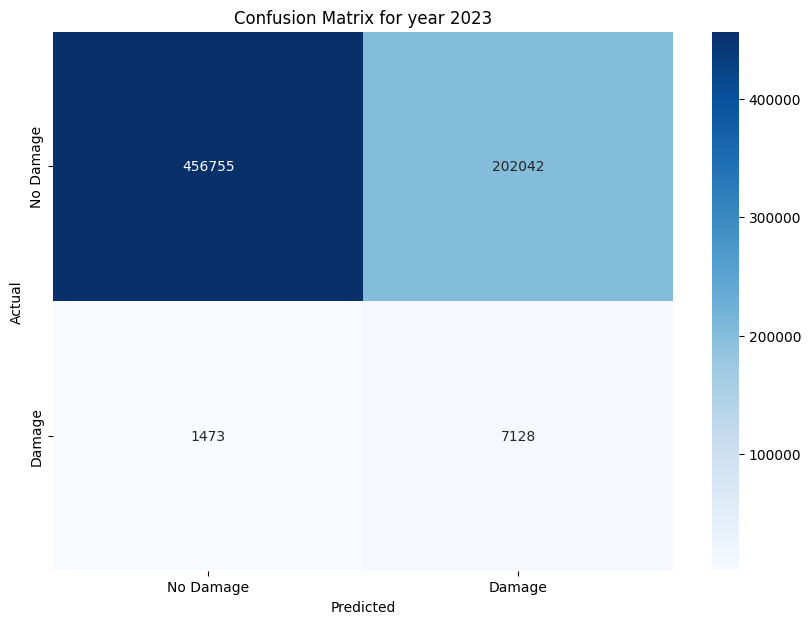

 90%|████████████████████████████████████████████████████████████████████████████████         | 9/10 [00:38<00:04,  4.33s/it]

Year: 2023
No Damage: 458228 (68.66%)
Damage: 209170 (31.34%)
Processing train year: 2023, test year: 2024
Classification report for year 2024:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80    663097
           1       0.01      0.86      0.01      1628

    accuracy                           0.67    664725
   macro avg       0.50      0.76      0.41    664725
weighted avg       1.00      0.67      0.80    664725

Confusion matrix for year 2024:
[[445655 217442]
 [   232   1396]]


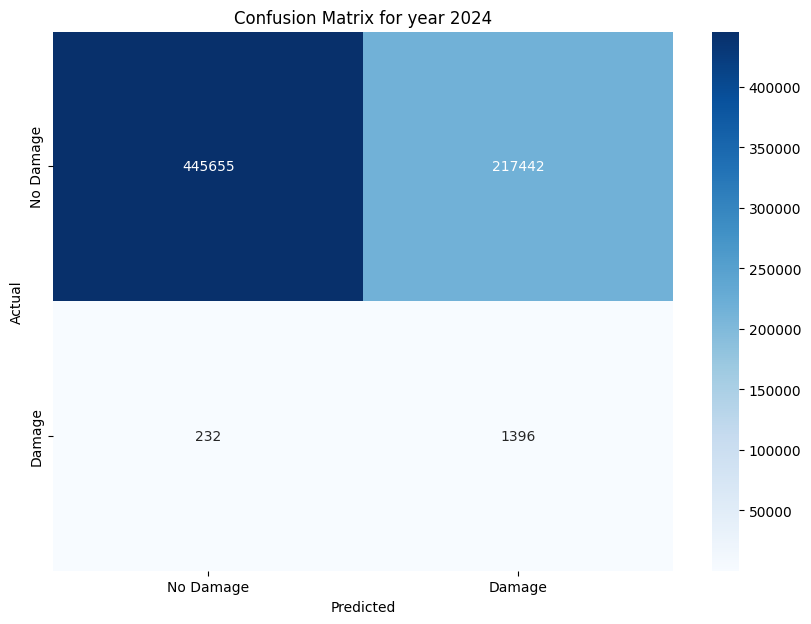

100%|████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.30s/it]

Year: 2024
No Damage: 445887 (67.08%)
Damage: 218838 (32.92%)
Year: 2015, Recall Score: 0.7026438569206843
Year: 2016, Recall Score: 0.7328275862068966
Year: 2017, Recall Score: 0.7267836919592299
Year: 2018, Recall Score: 0.7380210828941064
Year: 2019, Recall Score: 0.7537570967382834
Year: 2020, Recall Score: 0.7683669585078036
Year: 2021, Recall Score: 0.7890218522372529
Year: 2022, Recall Score: 0.8209654897267106
Year: 2023, Recall Score: 0.8287408440878967
Year: 2024, Recall Score: 0.8574938574938575
Recall scores over the years:
   Year    Recall
0  2015  0.702644
1  2016  0.732828
2  2017  0.726784
3  2018  0.738021
4  2019  0.753757
5  2020  0.768367
6  2021  0.789022
7  2022  0.820965
8  2023  0.828741
9  2024  0.857494


In [11]:
# Initialize lists to store results
recall_scores = []
predictions = []

# Create a list of unique years in the data
years = sorted(df_binary['YEAR'].unique())

# Loop over each year for rolling window estimation
for i in tqdm(range(len(years) - 1)):
    train_year = years[i]
    test_year = years[i + 1]

    print(f"Processing train year: {train_year}, test year: {test_year}")

    # Split data into training and testing sets based on year
    train_data = df_binary[df_binary['YEAR'] == train_year]
    test_data = df_binary[df_binary['YEAR'] == test_year]

    # Separate features and target
    X_train = train_data.drop(['YEAR', 'DAMAGE'], axis=1)
    y_train = train_data['DAMAGE']
    X_test = test_data.drop(['YEAR', 'DAMAGE'], axis=1)
    y_test = test_data['DAMAGE']

    # Resample the training data
    class_0 = train_data[train_data['DAMAGE'] == 0]
    class_1 = train_data[train_data['DAMAGE'] == 1]

    n_samples_0 = len(class_0) // 2  # Undersample class 0 to half its size
    n_samples_1 = n_samples_0 // 4  # Oversample class 1 to be 1/4 of the undersampled class 0

    class_0_resampled = resample(class_0, replace=False, n_samples=n_samples_0, random_state=42)
    class_1_resampled = resample(class_1, replace=True, n_samples=n_samples_1, random_state=42)

    train_resampled = pd.concat([class_0_resampled, class_1_resampled])

    X_train_resampled = train_resampled.drop(['YEAR', 'DAMAGE'], axis=1)
    y_train_resampled = train_resampled['DAMAGE']

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Logistic Regression model with class weights
    log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

    # Train the model on the training data
    log_reg.fit(X_train_scaled, y_train_resampled)

    # Make predictions on the test data
    y_pred = log_reg.predict(X_test_scaled)
    y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

    # Calculate recall score
    recall = recall_score(y_test, y_pred)
    recall_scores.append((test_year, recall))

    # Print the classification report for each year
    print(f"Classification report for year {test_year}:")
    print(classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for year {test_year}:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for year {test_year}')
    plt.show()

    # Save the predictions with ANO_SID and probabilities
    test_data_with_ids = contracts[contracts['YEAR'] == test_year][['ANO_SID']].copy()
    test_data_with_ids['Prediction'] = y_pred
    test_data_with_ids['Prediction_Probability'] = y_pred_proba
    predictions.append(test_data_with_ids)

    # Print the ratio between no damage and damage
    no_damage = (y_pred == 0).sum()
    damage = (y_pred == 1).sum()
    total = len(y_pred)
    print(f"Year: {test_year}")
    print(f"No Damage: {no_damage} ({no_damage / total:.2%})")
    print(f"Damage: {damage} ({damage / total:.2%})")

# Print recall scores
for year, score in recall_scores:
    print(f"Year: {year}, Recall Score: {score}")

# Convert recall scores to DataFrame for better visualization
recall_df = pd.DataFrame(recall_scores, columns=['Year', 'Recall'])

# Display the recall scores
print("Recall scores over the years:")
print(recall_df)

# Save predictions to a CSV file
predictions_df = pd.concat(predictions).reset_index(drop=True)
predictions_df.to_csv('/Users/minarandolf/Capstone/Capstone-Project/datasets/predictions.csv', index=False)

## Summary of the Results

In [ ]:
# Display the recall scores
print("Recall scores over the years:")
print(recall_df)